<a href="https://colab.research.google.com/github/iswariagnanadass/Face-Voice-and-Action-interaction-model-of-NAO-Humanoid-Robot/blob/master/PIMA_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

seed = 42
np.random.seed(seed)

In [0]:
pdata = pd.read_csv('pima_data2.csv')
pdata.head()

,n,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,dp,age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
pdata.describe()

,n,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,dp,age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
# Prepare the configuration to run the test
median_bmi = pdata['BMI'].median()
# Substitute it in the BMI column of the
# dataset where values are 0
pdata['BMI'] = pdata['BMI'].replace(
    to_replace=0, value=median_bmi)

In [0]:
median_bloodp = pdata['BloodP'].median()
# Substitute it in the BloodP column of the
# dataset where values are 0
pdata['BloodP'] = pdata['BloodP'].replace(
    to_replace=0, value=median_bloodp)

In [0]:
# Calculate the median value for PlGlcConc
median_plglcconc = pdata['PlGlcConc'].median()
# Substitute it in the PlGlcConc column of the
# dataset where values are 0
pdata['PlGlcConc'] = pdata['PlGlcConc'].replace(
    to_replace=0, value=median_plglcconc)

In [0]:
# Calculate the median value for SkinThick
median_skinthick = pdata['SkinThick'].median()
# Substitute it in the SkinThick column of the
# dataset where values are 0
pdata['SkinThick'] = pdata['SkinThick'].replace(
    to_replace=0, value=median_skinthick)

In [0]:
# Calculate the median value for TwoHourSerIns
median_twohourserins = pdata['TwoHourSerIns'].median()
# Substitute it in the TwoHourSerIns column of the
# dataset where values are 0
pdata['TwoHourSerIns'] = pdata['TwoHourSerIns'].replace(
    to_replace=0, value=median_twohourserins)   

In [0]:
from sklearn.model_selection import train_test_split

features = list(pdata.columns.values)
features.remove('Outcome')
print(features)
X = pdata[features]
y = pdata['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(X_train.shape)
print(X_test.shape)

['n', 'PlGlcConc', 'BloodP', 'SkinThick', 'TwoHourSerIns', 'BMI', 'dp', 'age']
(537, 8)
(231, 8)


In [0]:
X_train = X_train.values
y_train = y_train.values
X_test  = X_test.values
y_test  = y_test.values

In [0]:
NB_EPOCHS = 1000  # num of epochs to test for
BATCH_SIZE = 16

## Create our model
model = Sequential()

# 1st layer: input_dim=8, 12 nodes, RELU
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
# 2nd layer: 8 nodes, RELU
model.add(Dense(8, init='uniform', activation='relu'))
# output layer: dim=1, activation sigmoid
model.add(Dense(1, init='uniform', activation='sigmoid' ))

# Compile the model
model.compile(loss='binary_crossentropy',   # since we are predicting 0/1
             optimizer='adam',
             metrics=['accuracy'])

# checkpoint: store the best model
ckpt_model = 'pima-weights.best.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

print('Starting training...')
# train the model, store the results for plotting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    nb_epoch=NB_EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    verbose=0)

Instructions for updating:
Colocations handled automatically by placer.
Starting training...
Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, input_dim=8, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.



Epoch 00001: val_acc improved from -inf to 0.67965, saving model to pima-weights.best.hdf5

Epoch 00002: val_acc did not improve from 0.67965

Epoch 00003: val_acc did not improve from 0.67965

Epoch 00004: val_acc did not improve from 0.67965

Epoch 00005: val_acc did not improve from 0.67965

Epoch 00006: val_acc did not improve from 0.67965

Epoch 00007: val_acc did not improve from 0.67965

Epoch 00008: val_acc improved from 0.67965 to 0.70563, saving model to pima-weights.best.hdf5

Epoch 00009: val_acc did not improve from 0.70563

Epoch 00010: val_acc did not improve from 0.70563

Epoch 00011: val_acc did not improve from 0.70563

Epoch 00012: val_acc did not improve from 0.70563

Epoch 00013: val_acc did not improve from 0.70563

Epoch 00014: val_acc did not improve from 0.70563

Epoch 00015: val_acc did not improve from 0.70563

Epoch 00016: val_acc did not improve from 0.70563

Epoch 00017: val_acc did not improve from 0.70563

Epoch 00018: val_acc did not improve from 0.705

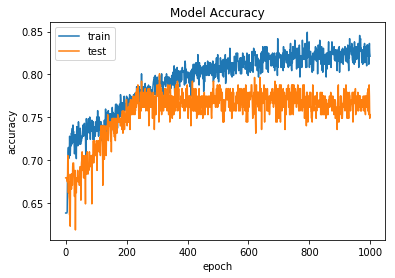

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

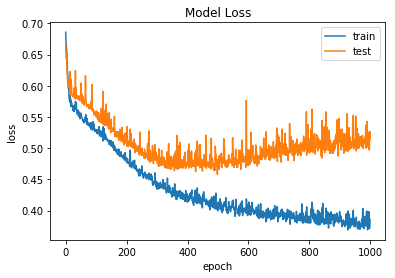

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [0]:
# print final accuracy
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 75.32%
